In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# Load the dataset
file_path = 'complete_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# 1. Basic Information
print("Dataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112504 entries, 0 to 112503
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   GeneID     112504 non-null  object 
 1   logFC      112504 non-null  float64
 2   AveExpr    112504 non-null  float64
 3   t          112504 non-null  float64
 4   P.Value    112504 non-null  float64
 5   adj.P.Val  112504 non-null  float64
 6   B          112504 non-null  float64
dtypes: float64(6), object(1)
memory usage: 6.0+ MB
None


In [ ]:
# 2. Summary Statistics
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
               logFC        AveExpr              t       P.Value  \
count  112504.000000  112504.000000  112504.000000  1.125040e+05   
mean       -2.714683       2.802194      -2.618834  2.339705e-01   
std         4.111434       3.438910       4.560057  3.018957e-01   
min       -17.898465      -4.447769     -16.751857  5.588310e-63   
25%        -5.519911      -0.164903      -5.151312  9.376643e-08   
50%        -0.102450       3.124950      -1.115505  5.692277e-02   
75%         0.040586       5.987818       0.434806  4.295508e-01   
max         5.415298      19.085394       8.912778  9.999919e-01   

          adj.P.Val              B  
count  1.125040e+05  112504.000000  
mean   3.532548e-01       6.911288  
std    3.829628e-01      20.061958  
min    2.198050e-58      -6.462030  
25%    1.012092e-06      -5.666860  
50%    1.471289e-01      -4.407427  
75%    8.053142e-01       7.435627  
max    9.999919e-01     125.018299  


In [ ]:
# Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
GeneID       0
logFC        0
AveExpr      0
t            0
P.Value      0
adj.P.Val    0
B            0
dtype: int64


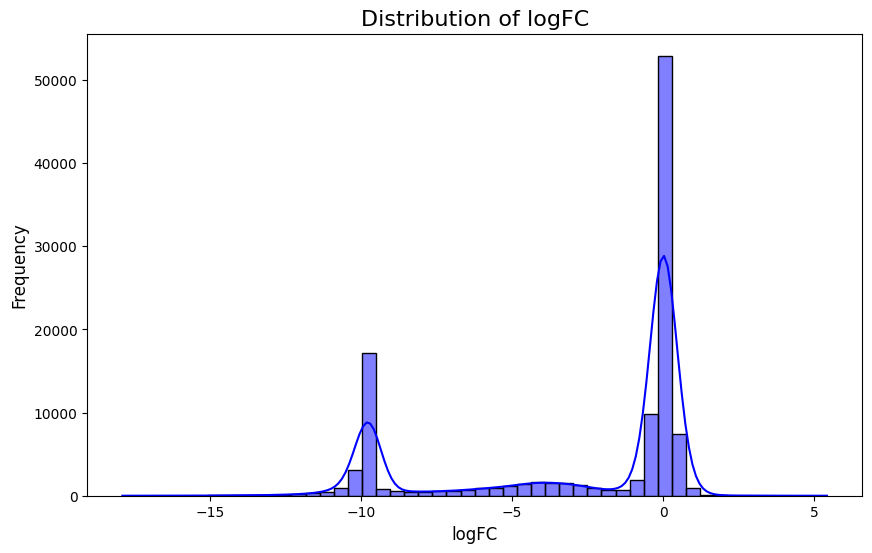

In [ ]:
# 3. Distribution Plots
# Distribution of logFC
plt.figure(figsize=(10, 6))
sns.histplot(data['logFC'], kde=True, bins=50, color='blue')
plt.title('Distribution of logFC', fontsize=16)
plt.xlabel('logFC', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

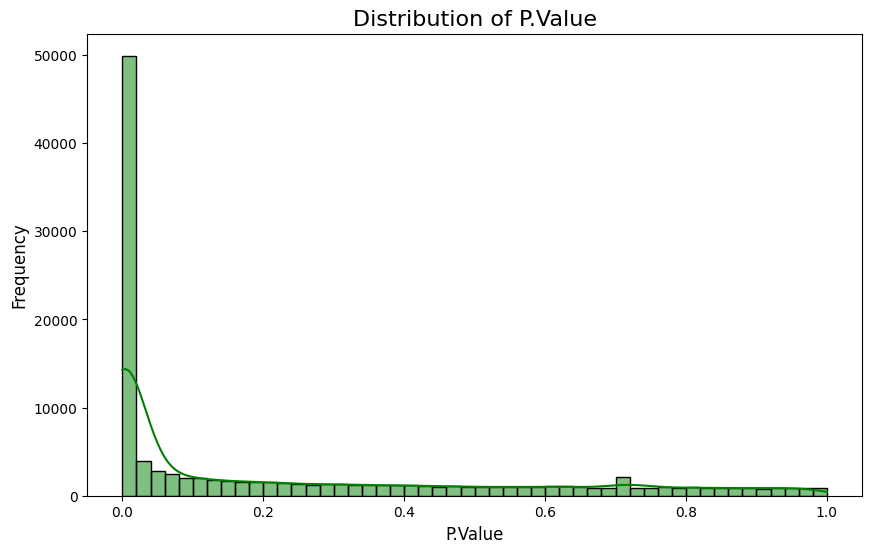

In [ ]:
# Distribution of P.Value
plt.figure(figsize=(10, 6))
sns.histplot(data['P.Value'], kde=True, bins=50, color='green')
plt.title('Distribution of P.Value', fontsize=16)
plt.xlabel('P.Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

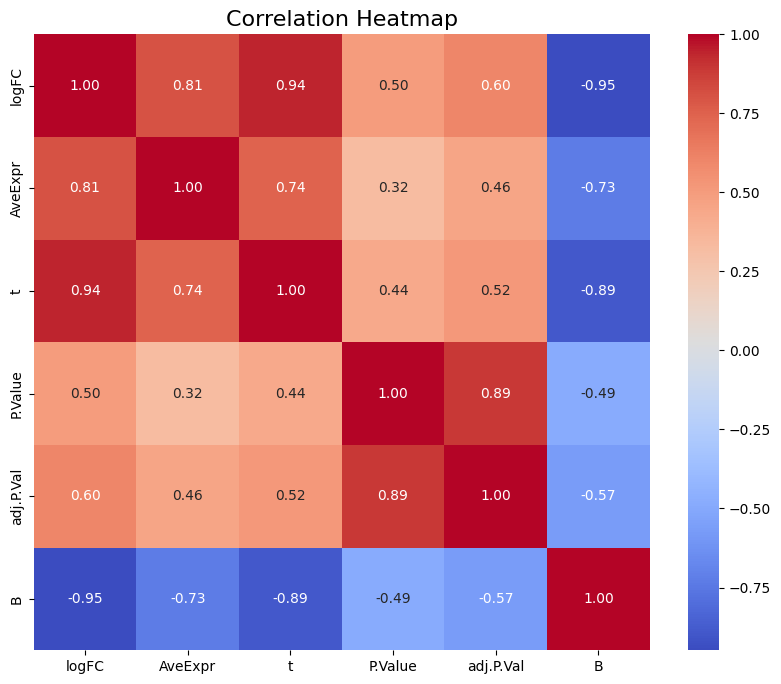

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

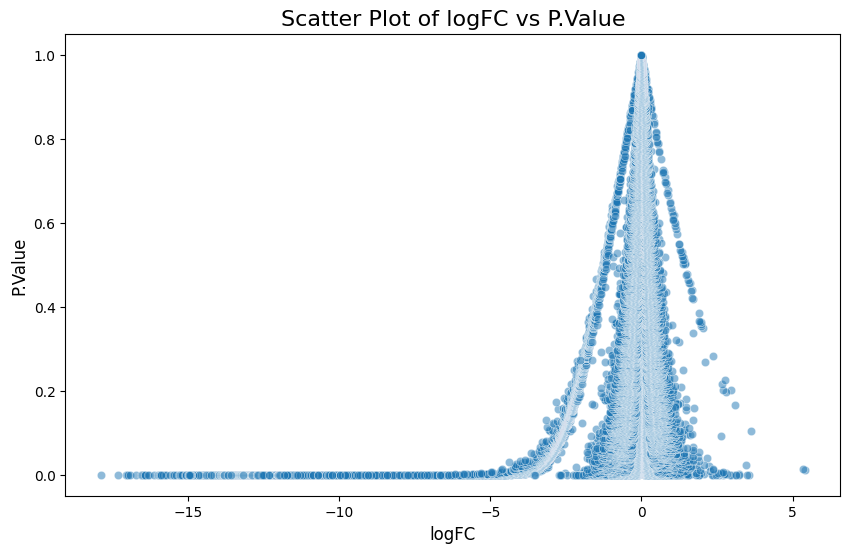

In [ ]:
# 5. Scatter Plot: logFC vs P.Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='logFC', y='P.Value', data=data, alpha=0.5, edgecolor='w')
plt.title('Scatter Plot of logFC vs P.Value', fontsize=16)
plt.xlabel('logFC', fontsize=12)
plt.ylabel('P.Value', fontsize=12)
plt.show()

In [ ]:
# Select a subset of genes for visualization (e.g., top 20 by absolute fold change)
top_genes = data.nlargest(20, 'logFC')  # Select top 20 genes with the highest logFC

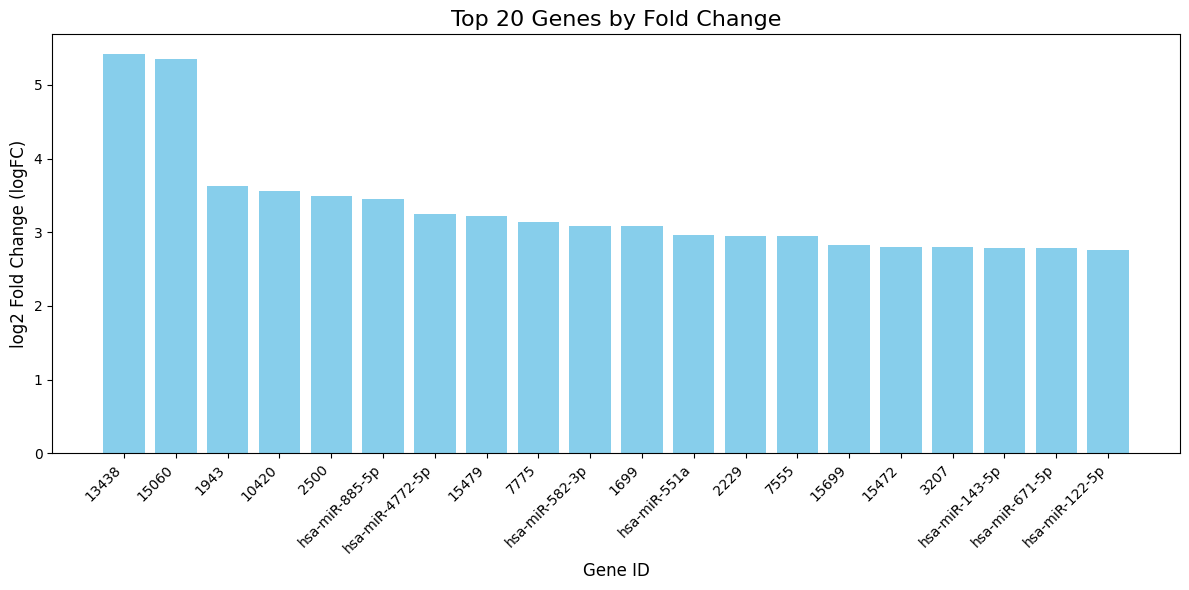

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_genes['GeneID'], top_genes['logFC'], color='skyblue')
plt.xlabel('Gene ID', fontsize=12)
plt.ylabel('log2 Fold Change (logFC)', fontsize=12)
plt.title('Top 20 Genes by Fold Change', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

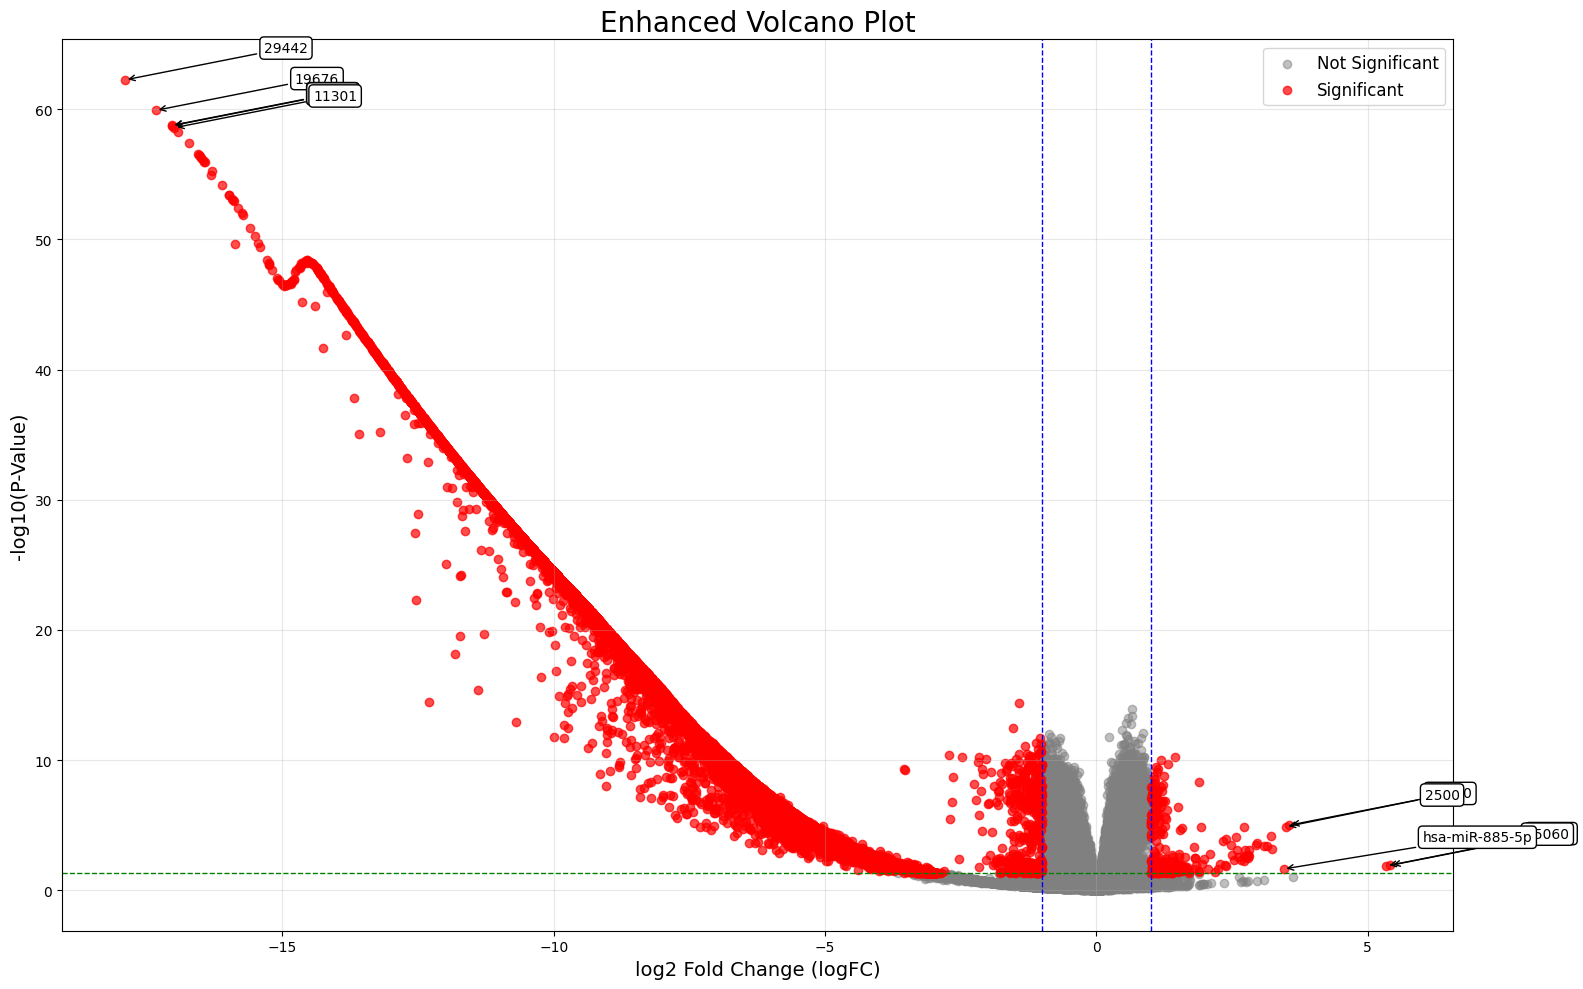

In [ ]:
# Thresholds
logfc_threshold = 1.0
pvalue_threshold = 0.05

# Add significance column
data['Significance'] = (abs(data['logFC']) >= logfc_threshold) & (data['P.Value'] <= pvalue_threshold)

# Volcano Plot
plt.figure(figsize=(16, 10))

# Plot non-significant points
plt.scatter(data[~data['Significance']]['logFC'],
            -np.log10(data[~data['Significance']]['P.Value']),
            color='gray', alpha=0.5, label='Not Significant')

# Plot significant points
plt.scatter(data[data['Significance']]['logFC'],
            -np.log10(data[data['Significance']]['P.Value']),
            color='red', alpha=0.7, label='Significant')

# Annotate top genes (smallest p-value and highest logFC)
top_genes_pval = data[data['Significance']].nsmallest(5, 'P.Value')
top_genes_logfc = data[data['Significance']].nlargest(5, 'logFC')
top_genes = pd.concat([top_genes_pval, top_genes_logfc]).drop_duplicates()

for i, row in top_genes.iterrows():
    plt.annotate(
        row['GeneID'],
        (row['logFC'], -np.log10(row['P.Value'])),
        fontsize=10,
        xytext=(100, 20),  # Increased offset
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', lw=1, color='black'),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
    )

# Threshold lines
plt.axvline(x=logfc_threshold, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=-logfc_threshold, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=-np.log10(pvalue_threshold), color='green', linestyle='--', linewidth=1)

# Customize plot
plt.title('Enhanced Volcano Plot', fontsize=20)
plt.xlabel('log2 Fold Change (logFC)', fontsize=14)
plt.ylabel('-log10(P-Value)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

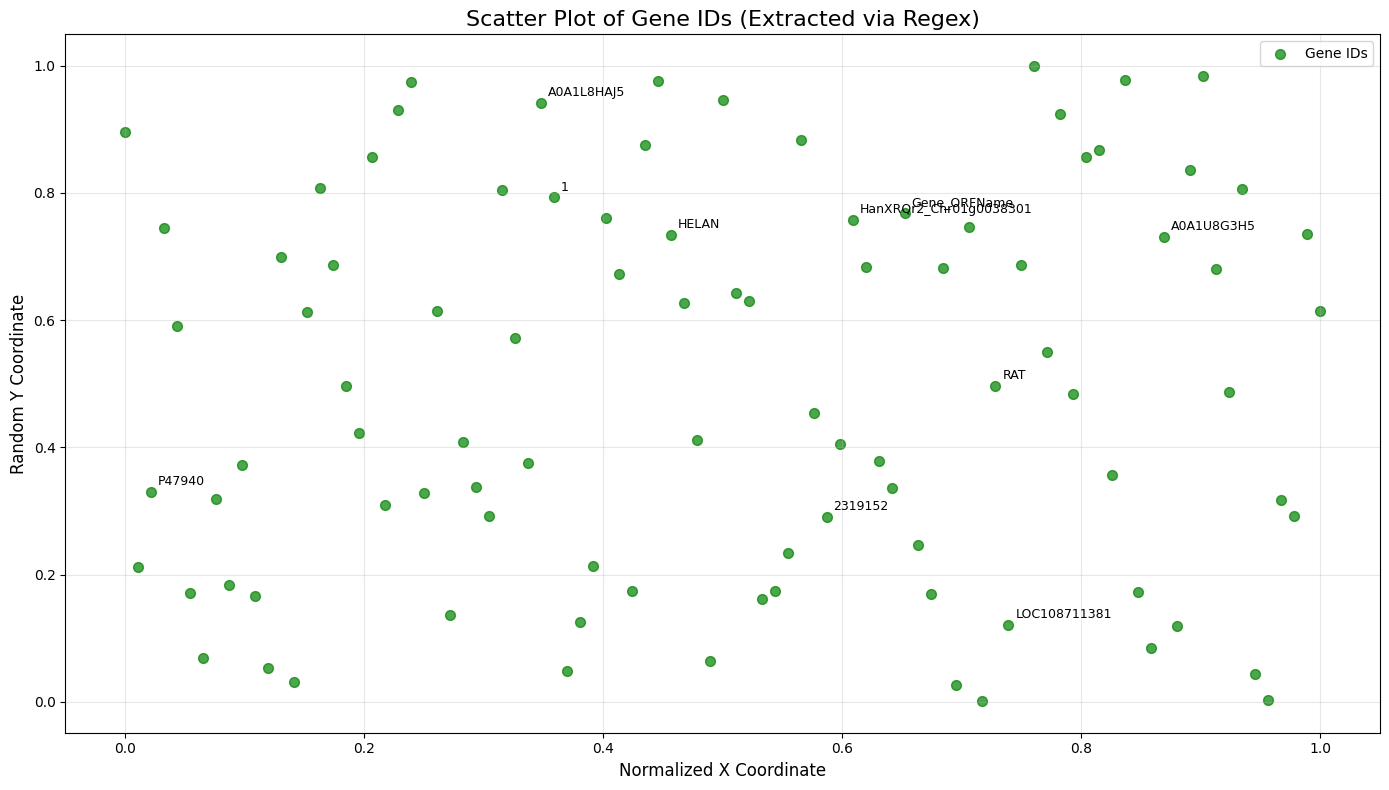

In [ ]:
import re

# Extract unique Gene IDs using regex
gene_ids = data['Gene'].dropna().apply(lambda x: re.findall(r'\w+', str(x)))
gene_ids_flat = [item for sublist in gene_ids for item in sublist]

# Create a DataFrame for unique Gene IDs
gene_ids_df = pd.DataFrame({'Gene_ID': list(set(gene_ids_flat))})

# Assign x and y coordinates for plotting
gene_ids_df['x'] = np.linspace(0, 1, len(gene_ids_df))  # Spread x-coordinates evenly
gene_ids_df['y'] = np.random.uniform(0, 1, len(gene_ids_df))  # Random y-coordinates for visualization

# Plot the scatter plot for Gene IDs
plt.figure(figsize=(14, 8))
plt.scatter(gene_ids_df['x'], gene_ids_df['y'], alpha=0.7, s=50, c='green', label="Gene IDs")
plt.title("Scatter Plot of Gene IDs (Extracted via Regex)", fontsize=16)
plt.xlabel("Normalized X Coordinate", fontsize=12)
plt.ylabel("Random Y Coordinate", fontsize=12)

# Highlight and annotate a few Gene IDs
highlighted_genes = gene_ids_df.sample(10)  # Highlight 10 random genes
for i, row in highlighted_genes.iterrows():
    plt.annotate(row['Gene_ID'], (row['x'], row['y']), fontsize=9, xytext=(5, 5), textcoords='offset points')

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()